In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings 

warnings.simplefilter('ignore')

data=pd.read_csv('/kaggle/input/smoke-detection-dataset/smoke_detection_iot.csv')
data=data.drop(['Unnamed: 0'],axis=1)
data.head()

,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0,0
1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,1,0
2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,2,0
3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,3,0
4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,4,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62630 entries, 0 to 62629
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   UTC             62630 non-null  int64  
 1   Temperature[C]  62630 non-null  float64
 2   Humidity[%]     62630 non-null  float64
 3   TVOC[ppb]       62630 non-null  int64  
 4   eCO2[ppm]       62630 non-null  int64  
 5   Raw H2          62630 non-null  int64  
 6   Raw Ethanol     62630 non-null  int64  
 7   Pressure[hPa]   62630 non-null  float64
 8   PM1.0           62630 non-null  float64
 9   PM2.5           62630 non-null  float64
 10  NC0.5           62630 non-null  float64
 11  NC1.0           62630 non-null  float64
 12  NC2.5           62630 non-null  float64
 13  CNT             62630 non-null  int64  
 14  Fire Alarm      62630 non-null  int64  
dtypes: float64(8), int64(7)
memory usage: 7.2 MB


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 567.0/567.0 kB 10.9 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 63.1 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.5
    Uninstalling matplotlib-3.7.5:
      Successfully uninstalled matplotlib-3.7.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
beatrix-jupyterlab 2023.128.151533 requires jupyterlab~=3.6.0, but you have jupyterlab 4.2.3 which is incompatible.
pointpats 2.5.0 requires shapely>=2, but you have shapely 1.8.5.post1 which is incompatible.
spopt 0.6.1 requires shapely>=2.0.1, but you have shapely 1.8.5.post1 which is incompatible.
ydata-profiling 4.6.4 requires matplotlib<3.9,>=3.2, but you have matplotlib 3.9.1 which is incompatible.
ydata-profiling 4.6.4 requires numpy<1.26,>=1.16.0, but you have numpy 1.26

[<Axes: title={'center': 'Target distribution'}, xlabel='count', ylabel='Fire Alarm'>,
 [<Figure size 2000x600 with 15 Axes>,
  array([[<Axes: title={'center': '0.998'}, xlabel='CNT', ylabel='Pressure[hPa]'>,
          <Axes: title={'center': '0.998'}, xlabel='UTC', ylabel='Raw H2'>,
          <Axes: title={'center': '0.998'}, xlabel='Humidity[%]', ylabel='UTC'>,
          <Axes: title={'center': '0.998'}, xlabel='UTC', ylabel='NC0.5'>]],
        dtype=object),
  <Figure size 1600x400 with 4 Axes>,
  <Figure size 640x480 with 1 Axes>],
 None]

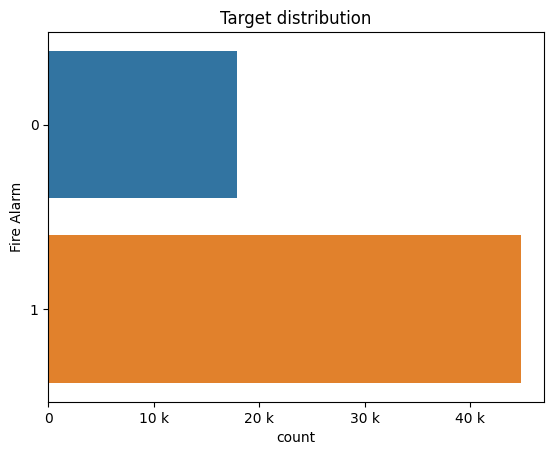

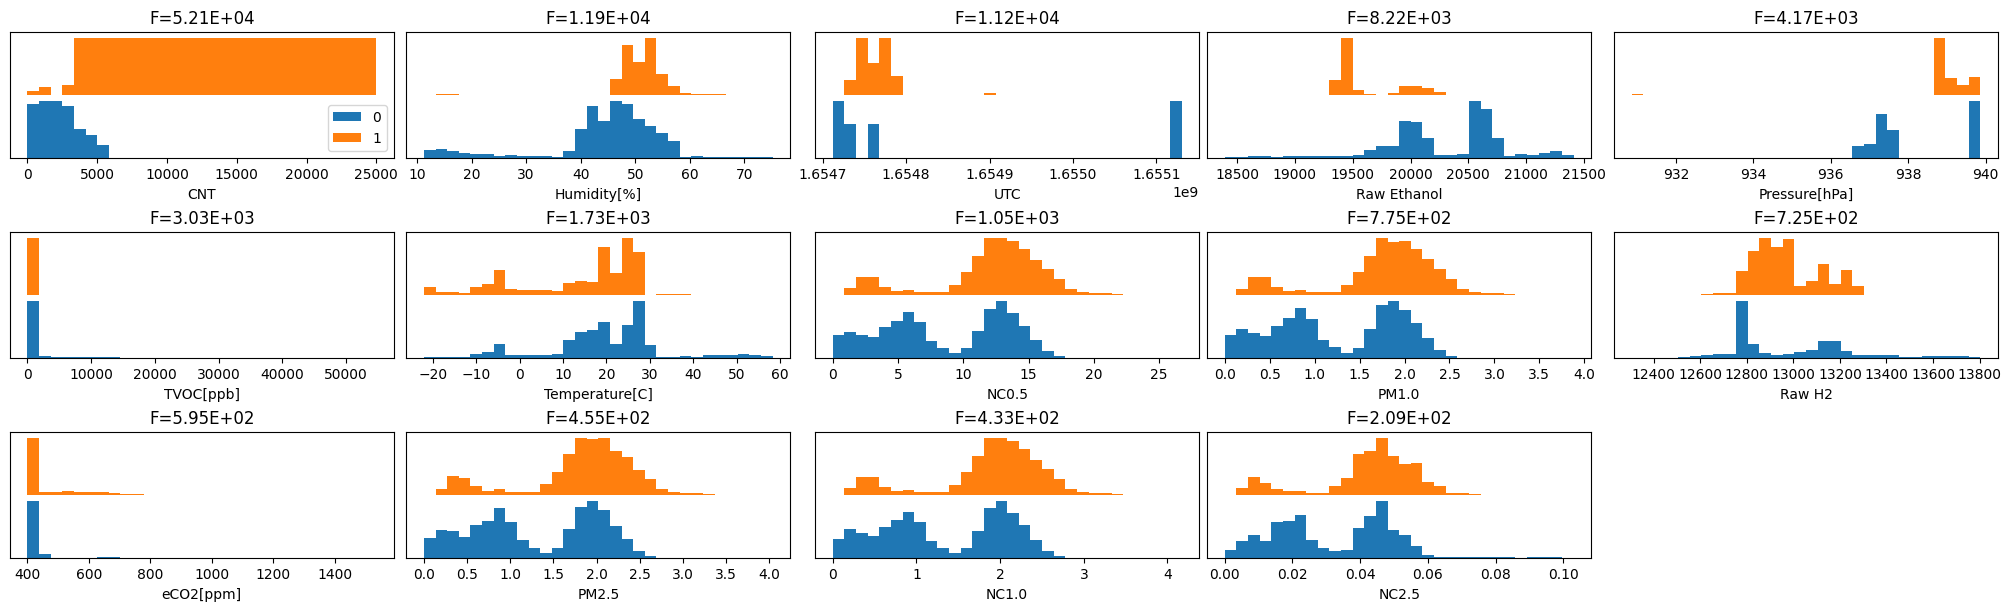

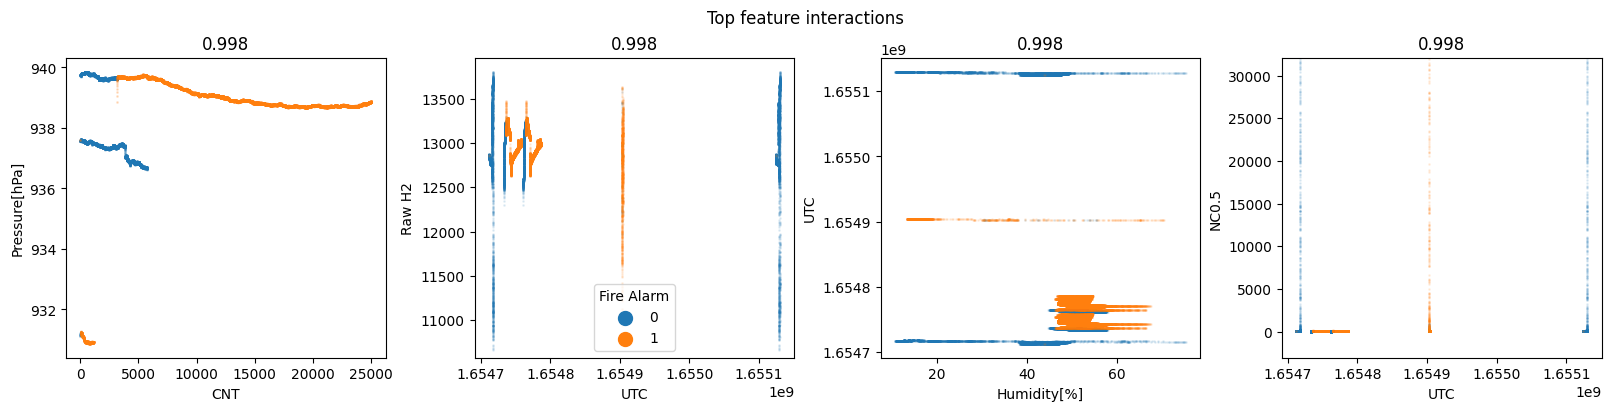

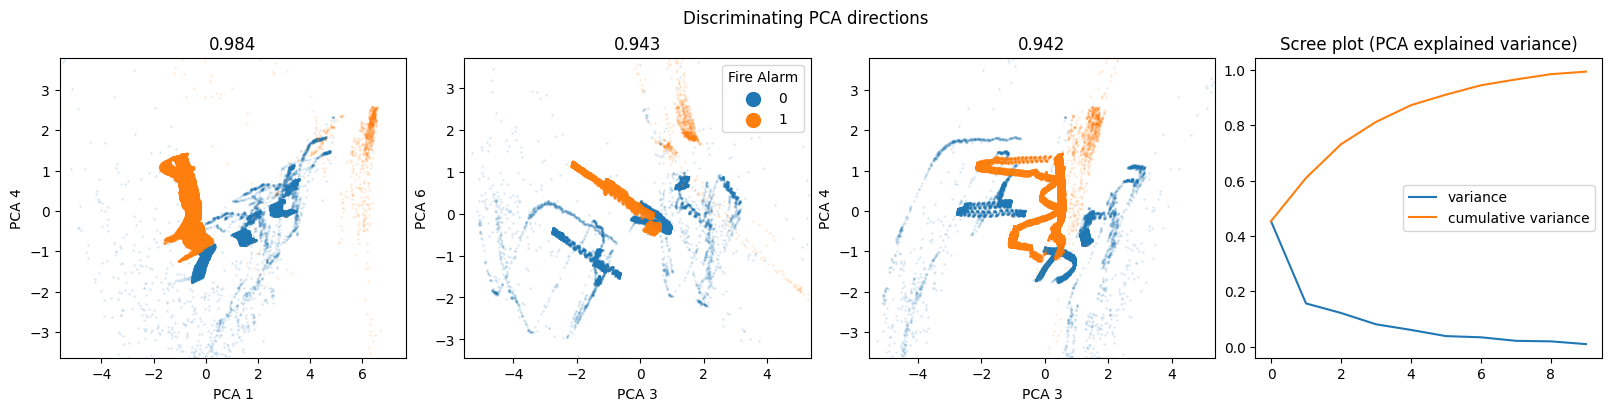

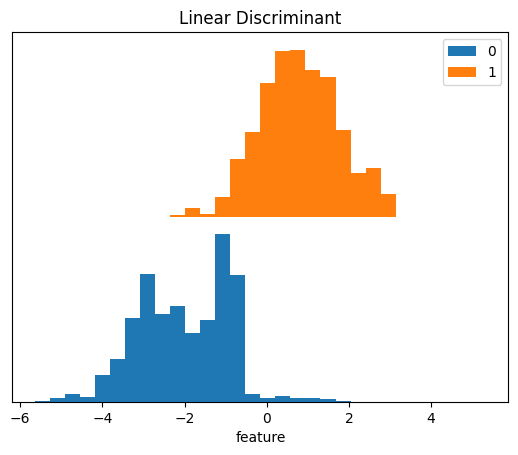

In [5]:
!pip install dabl
import dabl
dabl.plot(data,'Fire Alarm')

In [6]:
from sklearn.model_selection import train_test_split
data=data[['CNT','Humidity[%]','Raw Ethanol','Pressure[hPa]','NC0.5','PM1.0','PM2.5','NC1.0','NC2.5','Fire Alarm']]
trainx,testx,trainy,testy=train_test_split(data.drop(['Fire Alarm'],axis=1),(data['Fire Alarm']),test_size=0.2,random_state=1)
data.head()


,CNT,Humidity[%],Raw Ethanol,Pressure[hPa],NC0.5,PM1.0,PM2.5,NC1.0,NC2.5,Fire Alarm
0,0,57.36,18520,939.735,0.0,0.0,0.0,0.0,0.0,0
1,1,56.67,18651,939.744,0.0,0.0,0.0,0.0,0.0,0
2,2,55.96,18764,939.738,0.0,0.0,0.0,0.0,0.0,0
3,3,55.28,18849,939.736,0.0,0.0,0.0,0.0,0.0,0
4,4,54.69,18921,939.744,0.0,0.0,0.0,0.0,0.0,0


In [8]:
result_acc={}
result_roc={}

In [9]:
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score
svm=SVC(kernel="rbf",random_state=0)
svm.fit(trainx,trainy)
val_acc=svm.score(testx,testy)
print(val_acc)
pred=svm.predict(testx)
val_roc=roc_auc_score(testy,pred)
print(val_roc)
result_acc['svm']=val_acc
result_roc['svm']=val_roc


0.918968545425515
0.9188425054236903


In [10]:
from sklearn.neighbors import KNeighborsClassifier
knc=KNeighborsClassifier()
knc.fit(trainx,trainy)
val_acc=knc.score(testx,testy)
print(val_acc)
pred=knc.predict(testx)
val_roc=roc_auc_score(testy,pred)
print(val_roc)
result_acc['kneighbor']=val_acc
result_roc['kneighbor']=val_roc


0.9993613284368513
0.999468719267814


In [13]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(trainx,trainy)
val_acc=lr.score(testx,testy)
print(val_acc)
pred=lr.predict(testx)
val_roc=roc_auc_score(testy,pred)
print(val_roc)
result_acc['logistic']=val_acc
result_roc['logistic']=val_roc


0.9580871786683698
0.9612245370713554


In [14]:
from sklearn.neural_network import MLPClassifier
mlp=MLPClassifier()
mlp.fit(trainx,trainy)
val_acc=mlp.score(testx,testy)
print(val_acc)
pred=mlp.predict(testx)
val_roc=roc_auc_score(testy,pred)
print(val_roc)
result_acc['mlp']=val_acc
result_roc['mlp']=val_roc


0.9463515886955133
0.9569890241310977


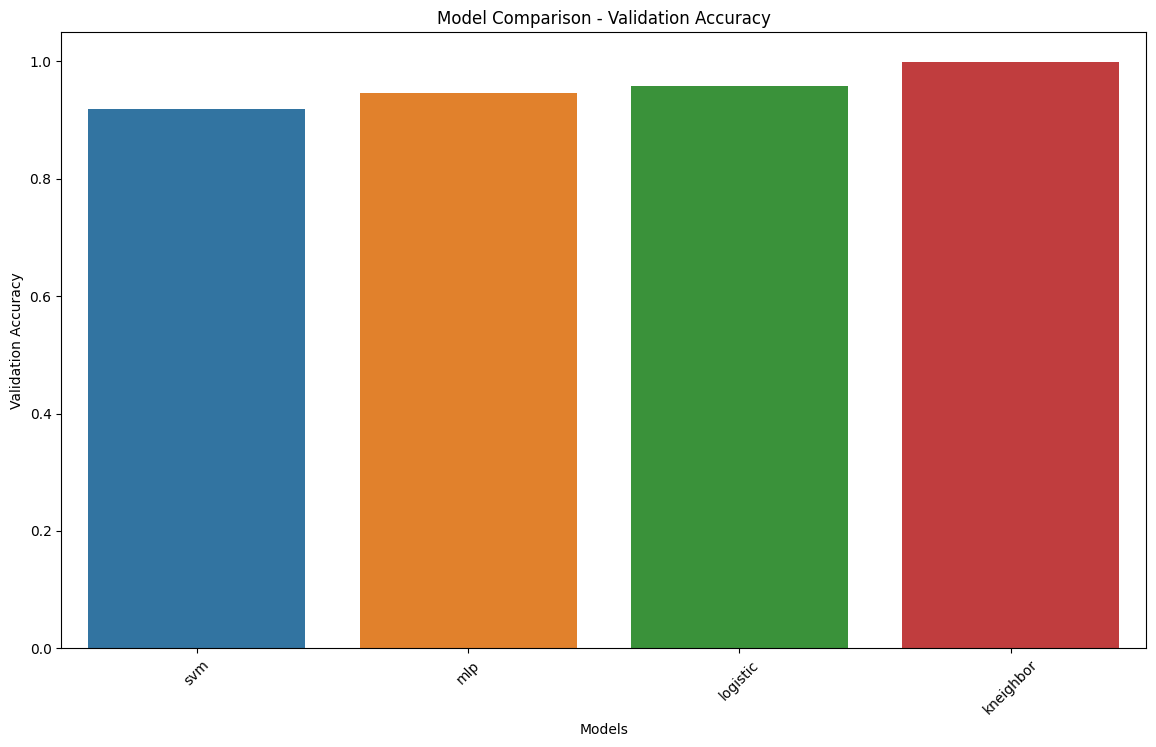

In [29]:
import seaborn as sns
sort_clf = dict(sorted(result_acc.items(), key=lambda x: x[1], reverse=True))

# Get the names and the corresponding scores
clf_names = list(sort_clf.keys())[::-1]
clf_scores = list(sort_clf.values())[::-1]

# Plot the results
plt.figure(figsize=(14, 8))
sns.barplot(x=clf_names, y=clf_scores)
plt.xlabel("Models")
plt.ylabel("Validation Accuracy")
plt.xticks(rotation=45)
plt.title("Model Comparison - Validation Accuracy")
plt.show()


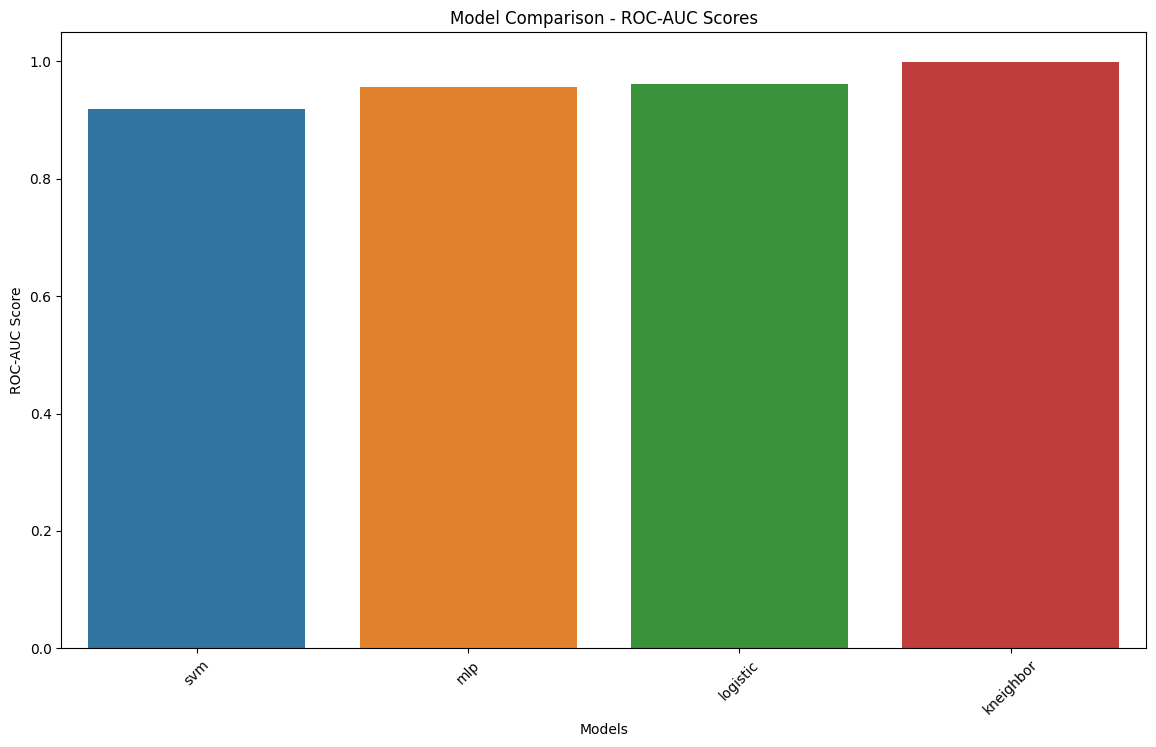

In [33]:
sort_clf = dict(sorted(result_roc.items(), key=lambda x: x[1], reverse=True))

# Get the names and the corresponding scores
clf_names = list(sort_clf.keys())[::-1]
clf_scores = list(sort_clf.values())[::-1]

# Plot the results
plt.figure(figsize=(14, 8))
sns.barplot(x=clf_names, y=clf_scores)
plt.xlabel("Models")
plt.ylabel("ROC-AUC Score")
plt.xticks(rotation=45)
plt.title("Model Comparison - ROC-AUC Scores")
plt.show()
